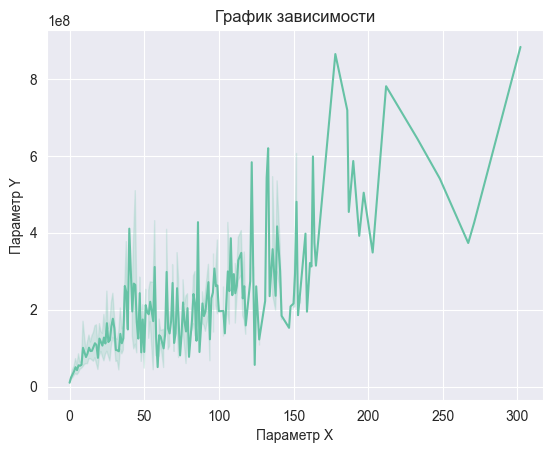

Среднеквадратическая ошибка = 1334822572354115.8


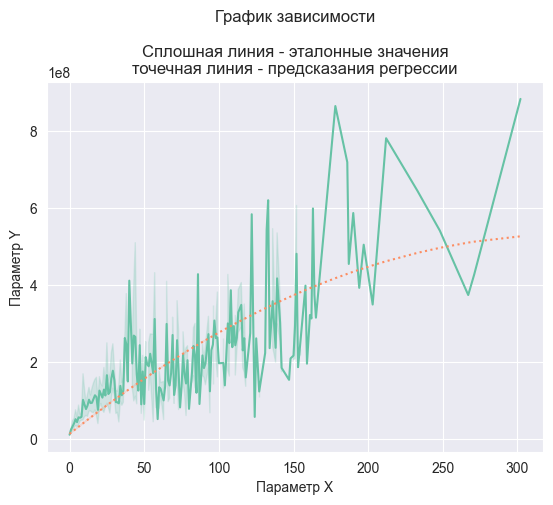

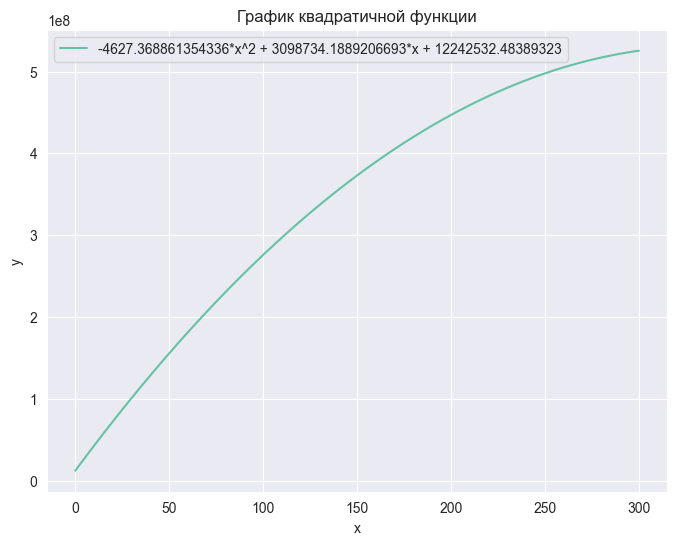

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

PATH = "spotify.csv"
DATASET_SIZE = 10000
dataset = pd.read_csv(PATH)
dataset = dataset.head(DATASET_SIZE)

dataset["Top 10 (xTimes)"] = pd.to_numeric(dataset["Top 10 (xTimes)"]) 
dataset["Total Streams"] = pd.to_numeric(dataset["Total Streams"])

sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
 x=dataset["Top 10 (xTimes)"],
 y=dataset["Total Streams"],
)
plt.title('График зависимости')
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

x = np.array(dataset["Top 10 (xTimes)"]).reshape(-1, 1)
y = np.array(dataset["Total Streams"]).reshape(-1, 1)

DEGREES = 2
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')


sns.lineplot(
 x=dataset["Top 10 (xTimes)"],
 y=dataset["Total Streams"],
 linestyle="solid"
)
sns.lineplot(
 x=dataset["Top 10 (xTimes)"],
 y=predictions.reshape(-1),
 linestyle="dotted"
)
plt.title(
 'График зависимости\n\n'
 'Сплошная линия - эталонные значения\n'
 'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

x_parameters = np.append(
 regression['linearregression'].intercept_[0],
 regression['linearregression'].coef_[0][1:]
)
x_parameters

x = np.linspace(0, 300, 10000)

# Определение квадратичной функции
y = x_parameters[2] * x**2 + x_parameters[1] * x + x_parameters[0]

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'{x_parameters[2]}*x^2 + {x_parameters[1]}*x + {x_parameters[0]}')
plt.title('График квадратичной функции')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
